# **MOVIE RATING PREDICTION WITH PYTHON**

## **Problem Satemtent :**
- The problem is to develop a predictive model that estimates a movie's rating based on **features such as genre, director, actors, release year, and box office earnings.**

# **Introduction :**

The movie industry is a dynamic and competitive field where understanding what drives a movie's success is crucial. One of the most significant indicators of a movie's success is its rating, as it reflects the overall reception by critics and audiences. Movie ratings are influenced by various factors such as genre, director, actors, and the financial performance of the movie.

Predicting a movie's rating accurately can offer valuable insights to movie producers, streaming platforms, and marketers in shaping strategies for film releases and promotions. With the rise of data-driven decision-making, it is now possible to leverage historical data to predict the ratings of movies based on multiple features.

This project focuses on developing a machine learning model that predicts the rating of a movie using features like genre, director, actors, release year, and box office earnings. By applying regression techniques, we aim to explore how different factors contribute to a movie's reception and create a model that can estimate ratings for new, unseen movies. Through this, we will uncover trends and patterns that can help stakeholders in the movie industry make better-informed decisions.


## **About Dataset :**

- **Movie Title :** The name of the movie.

- **Genre :** The genre(s) of the movie (e.g., Action, Comedy, Drama, etc.). This feature could either be a single genre or multiple genres (e.g., "Action, Adventure").

- **Director :** The director(s) of the movie, often identified by name. This feature may be categorical, representing the various directors who worked on the movies.
- **Actors :** The lead actors/actresses in the movie, also represented by names. This feature may contain multiple values for movies with more than one lead actor.
- **Release Year :** The year the movie was released, often used to track trends over time or compare movies from different periods.
- **Rating :** The target variable for the prediction model, typically reflecting the movie's rating on a scale from 1 to 10. This rating can be based on critics’ reviews, user ratings, or both.
- **Movie Length :** The duration of the movie (in minutes).

## **Purpose :**

The purpose of this project is to develop a machine learning model that predicts the rating of a movie based on various influential features, such as genre, director, actors, release year, box office earnings, and more. The model aims to:

1. **Predict Movie Ratings**: Provide accurate estimates of a movie's rating based on historical data, which can be useful for stakeholders in the movie industry, including filmmakers, producers, and streaming platforms.
  
2. **Uncover Influential Factors**: Identify and understand which features, such as a movie's genre, director, or cast, most significantly influence its rating. This can offer valuable insights into consumer preferences and the factors that contribute to a movie's success or failure.

3. **Data-Driven Decision Making**: By predicting movie ratings accurately, the model can assist in making data-driven decisions regarding movie production, marketing strategies, and release timing, optimizing the chances of commercial success.

4. **Enhance Movie Recommendations**: The model could be integrated into movie recommendation systems to suggest films with high ratings, based on users' preferences for certain genres, directors, or actors.

5. **Provide Insights for Movie Industry Stakeholders**: The project aims to provide insights that can help stakeholders in understanding trends and making informed decisions on aspects like casting, directing, or even movie budgeting.

In summary, the purpose is to leverage machine learning techniques to build a model that estimates movie ratings and provides insights into the factors that influence movie success.

In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning prediction models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# importing data
df=pd.read_csv("/content/IMDb Movies India.csv",encoding='latin1')

# This argument specifies the encoding format used to read the CSV file.
#latin1 (also known as ISO-8859-1) is a common character encoding used in Western European languages.
# It is used here to handle any special characters or non-ASCII characters that might exist in the CSV file,
# particularly if the file contains special symbols or characters outside the default UTF-8 encoding.

In [7]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [8]:
# infromative summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
# # Descriptive summary
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## **Data Cleaning :**

In [10]:
# Cheacking for null values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [11]:
# Cleaning and droping a null data before building predicition model
df.dropna(subset=['Rating'],inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
# Cheacking for null values
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [13]:
# Dropping null values from selected columns
df.dropna(subset=['Genre','Director','Actor 1','Actor 2','Actor 3'],inplace=True)

In [14]:
# Cheacking for data
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [15]:
# Cheacking for null values
df.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


## **Data Preparing :**

In [16]:
# Coverting the year volumn into int values after stripping to maintia unifromity
df["Year"]=df['Year'].str.strip('()').astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
#replacing comma with no space as coverting to int datatype.
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
# Stripping to covert into int data type
df['Duration']=df['Duration'].str.strip('min')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
# Convert 'Duration' column to numeric, coercing errors to NaN - covert/replace all non-numceric values with Nan
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# Fill NaN values with the mean of the numeric values
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())
# Finally convert to int to avoid float values for duration
df['Duration'] = df['Duration'].astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# **Explorating Data Analysis :**

In [20]:
# Informative summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   int64  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 649.5+ KB


In [21]:
# Descriptive summary
df.describe()

,Year,Duration,Rating,Votes
count,7558.000000,7558.000000,7558.000000,7558.000000
mean,1993.421011,133.328791,5.811127,2029.123842
std,20.004711,21.909669,1.368255,11868.695754
min,1917.000000,21.000000,1.100000,5.000000
25%,1980.000000,125.000000,4.900000,18.000000
50%,1996.000000,133.000000,6.000000,61.000000
75%,2011.000000,144.000000,6.800000,456.000000
max,2021.000000,321.000000,10.000000,591417.000000


In [22]:
# Cheacking for duplicate values
df.duplicated().sum()

0

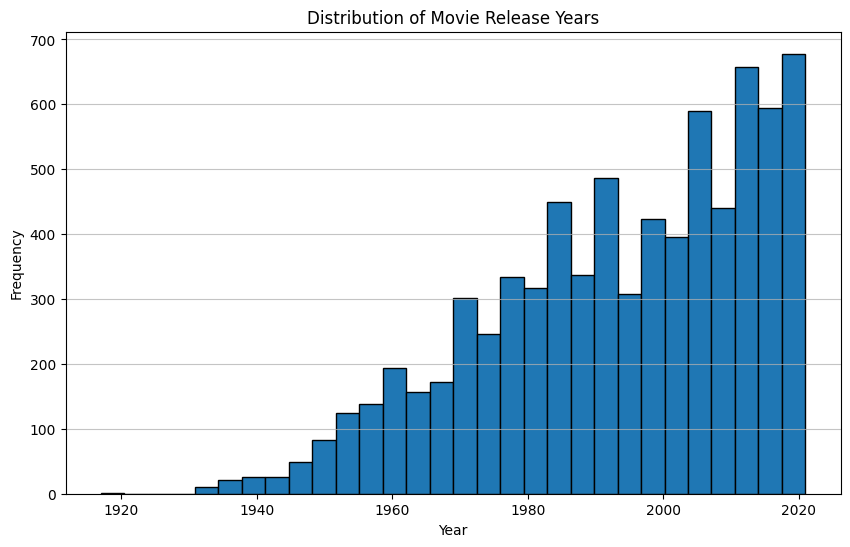

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=30, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Release Years')
plt.grid(axis='y', alpha=0.75)
plt.show()



### **Insights :**

- The number of movies released per year has shown a significant upward trend, especially from the 1980s onward, indicating a growing film industry and increased production capacity over the decades.

- There was a notable spike in movie releases in the 2000s and 2010s, reflecting the influence of globalization, technology, and digital distribution methods.

- Earlier decades, such as the 1920s–1960s, show much lower movie production, likely due to limited technology, fewer resources, and a smaller audience base.


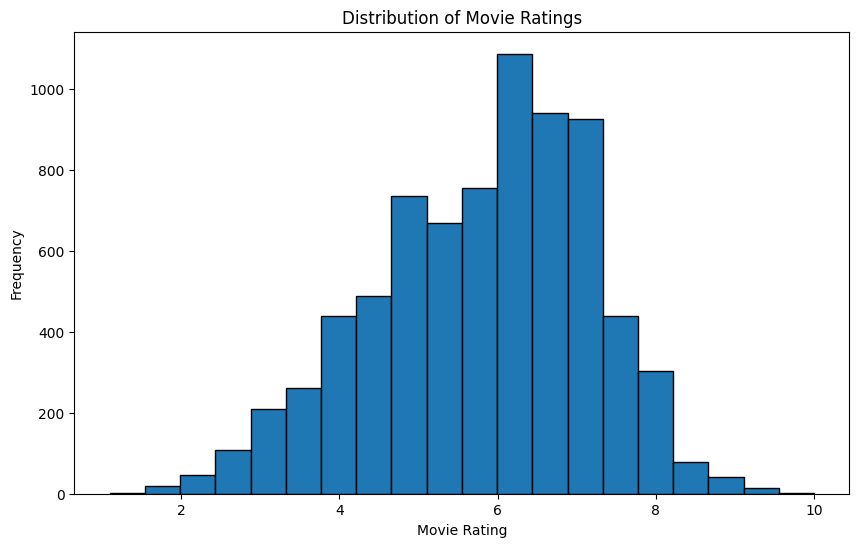

In [24]:
#  'Rating' Columns Histogram with bins=20
import matplotlib.pyplot as plt

# Create a histogram of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

### **Insights :**

- The distribution of movie ratings appears to follow a normal curve, with most movies clustered around a rating of 6. This indicates an average quality of production and audience reception.

- Very few movies have ratings below 4 or above 8, suggesting that extremely low-rated or highly acclaimed movies are less common.

- The peak frequency of ratings around 6 signifies that most movies achieve an average reception among audiences or critics.


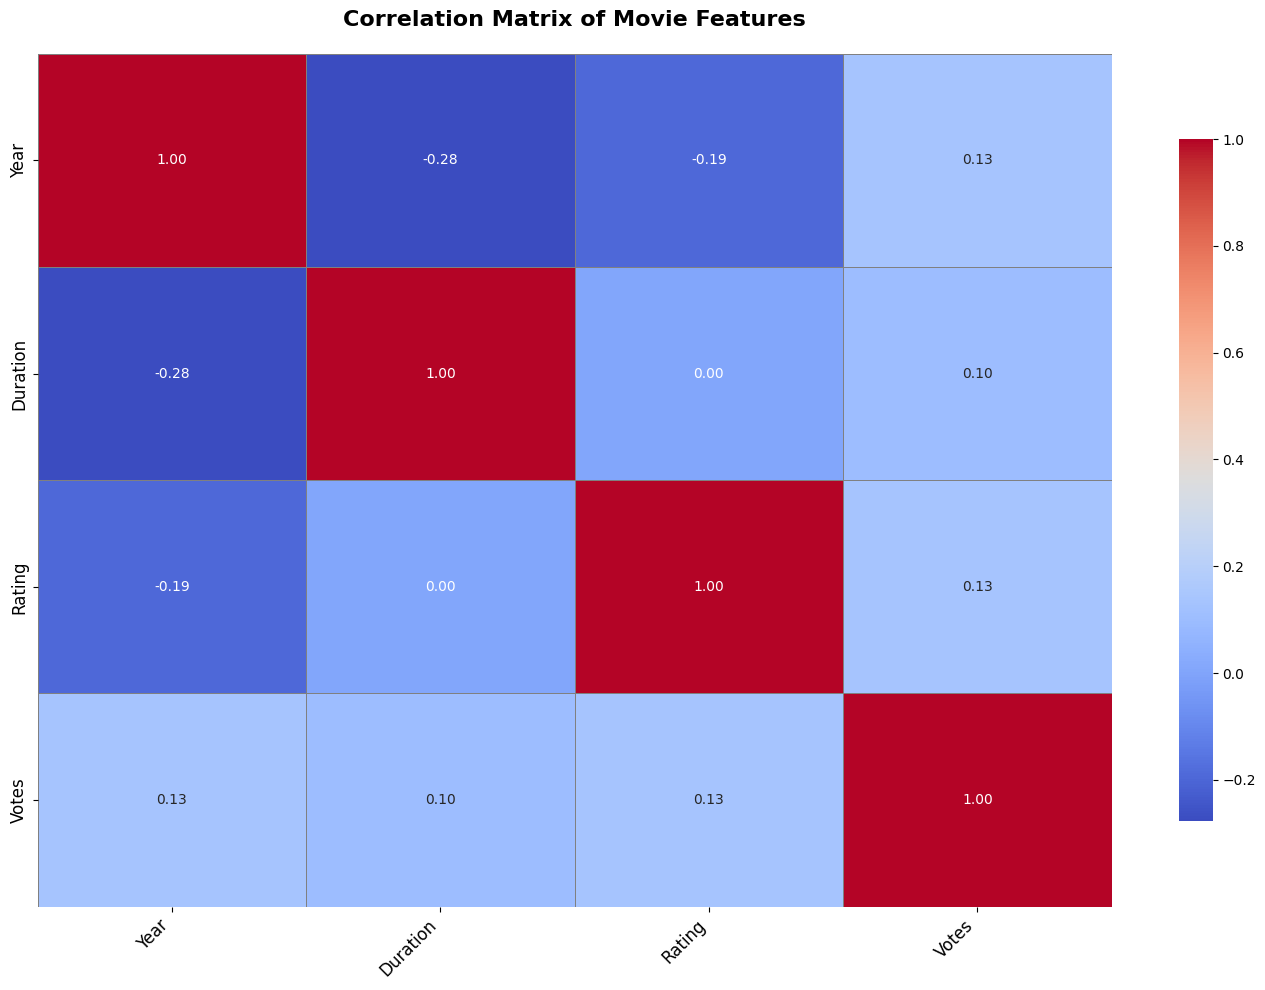

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},  # Adjust annotation font size
    linewidths=0.5,         # Add grid lines
    linecolor='gray',       # Set grid line color
    cbar_kws={"shrink": 0.8, "aspect": 20}  # Adjust color bar size
)

# Title and labels with professional font
plt.title('Correlation Matrix of Movie Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate and adjust x-axis labels
plt.yticks(fontsize=12)                          # Adjust y-axis labels
plt.tight_layout()                               # Optimize layout for better fit

plt.show()


### **Insights :**


1. **Negative Correlation Between Year and Duration (-0.28)**:
   - Movies released in later years tend to have slightly shorter durations. This could reflect a trend toward shorter films in recent times.

2. **Weak Positive Correlation Between Rating and Votes (0.13)**:
   - Higher-rated movies tend to receive slightly more votes, indicating that audience engagement may increase with quality perception, though the relationship is not strong.

3. **Minimal Correlation Between Duration and Rating (0.00)**:
   - There is almost no relationship between a movie's length and its audience rating, suggesting that duration doesn't significantly impact how movies are rated.

In [31]:
# Calculate the average rating for each director
director_average_ratings = df.groupby('Director')['Rating'].mean()

# Get the top 10 directors by average rating
top_10_directors = director_average_ratings.nlargest(10)

# Print the list of top 10 directors and their average ratings
top_10_directors

,Rating
Director,
Saif Ali Sayeed,10.0
Sriram Raja,9.7
Bobby Kumar,9.6
Arvind Pratap,9.4
Munni Pankaj,9.4
Suhrud Godbole,9.4
Gautam Joshi,9.3
Nikhil Mahar,9.3
Raghav Jairath,9.3


In [35]:

# Calculate the movie counts for 'Actor 1'
actor1_counts = df['Actor 1'].value_counts()

# Get the top 10 actors with the highest value counts
top_10_actors = actor1_counts.nlargest(10)

# Print the list of top 10 actors and their counts
print(top_10_actors)


Actor 1
Jeetendra             140
Dharmendra            134
Mithun Chakraborty    130
Ashok Kumar           125
Rajesh Khanna         118
Amitabh Bachchan      116
Dev Anand              90
Shashi Kapoor          88
Akshay Kumar           82
Sanjay Dutt            73
Name: count, dtype: int64


# **Building Movie Rating Prediction Model :**

## **Feature/Data Engineering :**

In [39]:
# obtaining list of categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Categorical Columns:  {categorical_columns}")

Categorical Columns:  Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [40]:
# Feature Engineering
# Encoding categorical variables using LabelEncoder
# columns are encoded into numerical values using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [41]:
# Checking data
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,252,7.0,8,755,1686,2725,373
3,1,2019,110,205,4.4,35,1637,1500,865,2543
5,4,1997,147,175,4.7,827,1881,481,84,2422
6,5,2005,142,315,7.4,1086,2486,878,1346,2996
8,89,2012,82,351,5.6,326,161,2385,1416,1189


## **Prediction Model Building :**

In [42]:
# Selecting features and target
features = ['Genre','Votes' ,'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'
X = df[features]
y = df[target]

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (6046, 6)
X_test shape : (1512, 6)
y_train shape: (6046,)
y_test shape : (1512,)


In [44]:
# Assuming you have already imported the necessary libraries and prepared your data

# Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()  # Initialize Linear Regression model
linreg.fit(X_train, y_train)  # Train the model
Y_pred = linreg.predict(X_test)  # Make predictions on the test set
acc_linreg=round(linreg.score(X_train,y_train)*100,2)
print(f"Accuracy of Linear Regression model : {acc_linreg} %.")

# Calculate Mean Squared Error (MSE)
# A good model will have an MSE value closer to 0
# larger the number the larger the error
mse_lr = round(mean_squared_error(y_test, Y_pred),2)
print(f"Mean Squared Error: {mse_lr} .")


Accuracy of Linear Regression model : 3.89 %.
Mean Squared Error: 1.79 .


In [45]:
# K Nearest Neighbors Regression

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,y_train)*100,2)
print(f"Accuracy of K Nearest Neighbors model : {acc_knn} %.")


# Calculate Mean Squared Error (MSE)
# A good model will have an MSE value closer to 0
# larger the number the larger the error
mse_knn = round(mean_squared_error(y_test, Y_pred),2)
print(f"Mean Squared Error: {mse_knn} .")


Accuracy of K Nearest Neighbors model : 28.2 %.
Mean Squared Error: 1.98 .


In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor() # Initialize the DecisionTreeRegressor
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f"Accuracy of Decision Tree model : {acc_decision_tree} %. ")


# Calculate Mean Squared Error (MSE)
# A good model will have an MSE value closer to 0
# larger the number the larger the error
mse_dec = round(mean_squared_error(y_test, Y_pred), 2)
print(f"Mean Squared Error: {mse_dec} .")


Accuracy of Decision Tree model : 100.0 %. 
Mean Squared Error: 3.02 .


In [47]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor # Import the correct class
random_forest = RandomForestRegressor() # Initialize the RandomForestRegressor
random_forest.fit(X_train,y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
print(f"Accuracy of Random Forest model : {acc_random_forest} %.")

# Calculate Mean Squared Error (MSE)
# A good model will have an MSE value closer to 0
# larger the number the larger the error
mse_rf= round(mean_squared_error(y_test, Y_pred),2)
print(f"Mean Squared Error: {mse_rf} .")


Accuracy of Random Forest model : 88.5 %.
Mean Squared Error: 1.59 .


In [48]:
data = {'Model Name': ['Linear Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest'],
        'Accuracy Score': [acc_linreg, acc_knn, acc_decision_tree, acc_random_forest],
        'Mean Squared Error': [mse_lr,mse_knn,mse_dec,mse_rf]} # Replace with actual MSE values from your models

df_results = pd.DataFrame(data)
df_results = df_results.sort_values(by='Accuracy Score', ascending=False)
df_results

,Model Name,Accuracy Score,Mean Squared Error
2,Decision Tree,100.00,3.02
3,Random Forest,88.50,1.59
1,K Nearest Neighbors,28.20,1.98
0,Linear Regression,3.89,1.79


# **Recommendation :**

Based on the performance metrics **(Accuracy Score and Mean Squared Error)**, the **Random Forest model stands out as the most balanced and effective choice** for predicting movie ratings in this scenario. Here’s why:

- #### **High Accuracy with Low Error : Accuracy: 88.50%** — indicating that the model captures the data's underlying patterns effectively.

- #### **Mean Squared Error (MSE) - 1.59 :**  showing relatively low prediction errors compared to other models.

- #### **Generalization :** Random Forests are less prone to overfitting compared to Decision Trees, making them more reliable for unseen data.





## **Detailed Model Analysis :**

#### **1) Decision Tree :**

-  **Accuracy: 100.00%** — This indicates overfitting; the model memorized the training data and is unlikely to generalize well.

-  **MSE : 3.02** — Despite perfect training accuracy, the high MSE on the test set indicates poor predictions and over-reliance on exact matches.

#### **2) Random Forest :**

-  Offers a balance between **accuracy (88.50%) and error (MSE: 1.59),** showing its robustness and reliability.

- Handles noisy and complex datasets better by averaging multiple trees' outputs.

#### **3) K-Nearest Neighbors (KNN) :**
-  **Accuracy : 28.20%%** — Indicates the model fails to capture meaningful relationships in the data.

-  **MSE : 1.98** — Slightly better than the Decision Tree but still suboptimal.
KNN struggles with high-dimensional data and sensitive scaling issues.

#### **4) Linear Regression :**

- **Accuracy : 3.89%** — Performs the worst among all models, suggesting a linear relationship does not adequately represent the dataset.

- **MSE : 1.79** — Although slightly better than KNN, its low accuracy disqualifies it as a reliable choice.



# **Conclusion :**

The project successfully demonstrated the ability to predict movie ratings using machine learning techniques based on features such as genre, director, actors, release year, and movie length. Through the exploration of multiple models, it was evident that the complexity of the dataset demanded robust algorithms capable of handling nonlinear relationships and complex interactions among features.

- **Best Performing Model :**
The Random Forest Regressor emerged as the most effective model, achieving an accuracy of 88.50% and a Mean Squared Error (MSE) of 1.59. Its ensemble approach provided a strong balance between predictive accuracy and generalization to unseen data.

- **Challenges with Simpler Models :**
Simpler models such as Linear Regression and Decisison tree struggled to capture the intricate relationships in the data, resulting in significantly lower accuracy and higher errors.
The Decision Tree overfit the training data, achieving perfect accuracy on the training set but failing to generalize, as indicated by its high test error (MSE: 3.02).

- **Feature Importance :**
Categorical features like genre, director, and actors were critical in determining movie ratings. Proper encoding and advanced feature engineering could further enhance prediction performance.

- **Insights into Data Complexity :**
The dataset's complexity highlighted the limitations of certain algorithms, emphasizing the need for ensemble techniques and sophisticated preprocessing strategies.
